### Time Series Forecasting - Statistical approach

In [129]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [130]:
# Import clean data set
df = pd.read_csv("data/clean_dataset.csv")

In [131]:
df.head()

,Unnamed: 0,business_unit,client_typo,code_market,code_resort,loyal_new,market,month,resort,sector_resort,week_ref,year,nbr_gm
0,0,CH-ML,Adults,370,AEXC,New,CHINA MAINLAND,12,ARCS EXTREME,EUROPE MOUNTAIN,2018-12-15,2018,2
1,1,CH-ML,Adults,370,AEXC,New,CHINA MAINLAND,12,ARCS EXTREME,EUROPE MOUNTAIN,2019-12-14,2019,1
2,2,CH-ML,Adults,370,ALBC,Loyal,CHINA MAINLAND,1,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2018-01-27,2018,9
3,3,CH-ML,Adults,370,ALBC,Loyal,CHINA MAINLAND,1,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2019-01-26,2019,6
4,4,CH-ML,Adults,370,ALBC,Loyal,CHINA MAINLAND,1,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2020-01-04,2020,2


In [132]:
df_copy = df.copy()

## Feature engineering
1. Perform date decomposition
2. Create categorical variables & OHE
3. Create Lag Features
4. Rolling Mean
5. Fourier Transformation

In [133]:
# Drop month string column
df_copy.drop(columns = ['code_market', 'code_resort','year', 'month'], inplace = True)
df_copy.head()

,Unnamed: 0,business_unit,client_typo,loyal_new,market,resort,sector_resort,week_ref,nbr_gm
0,0,CH-ML,Adults,New,CHINA MAINLAND,ARCS EXTREME,EUROPE MOUNTAIN,2018-12-15,2
1,1,CH-ML,Adults,New,CHINA MAINLAND,ARCS EXTREME,EUROPE MOUNTAIN,2019-12-14,1
2,2,CH-ML,Adults,Loyal,CHINA MAINLAND,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2018-01-27,9
3,3,CH-ML,Adults,Loyal,CHINA MAINLAND,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2019-01-26,6
4,4,CH-ML,Adults,Loyal,CHINA MAINLAND,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2020-01-04,2


In [134]:
df_copy.head()

,Unnamed: 0,business_unit,client_typo,loyal_new,market,resort,sector_resort,week_ref,nbr_gm
0,0,CH-ML,Adults,New,CHINA MAINLAND,ARCS EXTREME,EUROPE MOUNTAIN,2018-12-15,2
1,1,CH-ML,Adults,New,CHINA MAINLAND,ARCS EXTREME,EUROPE MOUNTAIN,2019-12-14,1
2,2,CH-ML,Adults,Loyal,CHINA MAINLAND,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2018-01-27,9
3,3,CH-ML,Adults,Loyal,CHINA MAINLAND,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2019-01-26,6
4,4,CH-ML,Adults,Loyal,CHINA MAINLAND,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2020-01-04,2


In [135]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200300 entries, 0 to 200299
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     200300 non-null  int64 
 1   business_unit  200300 non-null  object
 2   client_typo    200300 non-null  object
 3   loyal_new      200300 non-null  object
 4   market         200300 non-null  object
 5   resort         200300 non-null  object
 6   sector_resort  200300 non-null  object
 7   week_ref       200300 non-null  object
 8   nbr_gm         200300 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 13.8+ MB


In [136]:
# Sort dates
df_copy.sort_values(by = ['week_ref'], axis = 0, inplace = True)

In [137]:
def process_data(df, condition = ['week_ref']):
    
    summed_nbr_gm = df.groupby(condition)['nbr_gm'].sum().reset_index()

    categories = df.drop(columns=condition + ['nbr_gm'])


    dummies = pd.get_dummies(categories, dtype=int)


    dummies[condition] = df[condition]

    summed_dummies = dummies.groupby(condition).sum().reset_index()

    processed_data = pd.merge(summed_nbr_gm, summed_dummies, on=condition, how='outer')
    
    processed_data.drop(["Unnamed: 0"], axis=1, inplace=True)

    processed_data['week_ref']= pd.to_datetime(processed_data["week_ref"])
    processed_data['year'] = processed_data['week_ref'].dt.year
    processed_data['month'] = processed_data['week_ref'].dt.month
    processed_data['week'] = processed_data['week_ref'].dt.isocalendar().week

    return processed_data

process = process_data(df_copy)

In [138]:
process.tail()

,week_ref,nbr_gm,business_unit_CH-ML,business_unit_EAF,business_unit_ESAP,business_unit_NORTH AMERICA,business_unit_SOUTH AMERICA,client_typo_Adults,client_typo_Family,loyal_new_Loyal,...,sector_resort_CLUB MED TWO,sector_resort_EUROPE AFRICA SEA & COUNTRYSIDE,sector_resort_EUROPE MOUNTAIN,sector_resort_JOYVIEW,sector_resort_NORTH AMERICA,sector_resort_SOUTH AMERICA,sector_resort_URBAN OASIS,year,month,week
309,2023-12-02,17695,56,291,240,100,60,453,294,292,...,9,116,67,12,175,32,7,2023,12,48
310,2023-12-09,20368,60,326,269,105,54,427,387,321,...,6,99,148,10,178,27,8,2023,12,49
311,2023-12-16,31081,83,587,389,145,84,578,710,545,...,0,138,435,11,219,41,8,2023,12,50
312,2023-12-23,38501,86,810,398,169,78,661,880,694,...,18,150,574,14,237,50,8,2023,12,51
313,2023-12-30,18497,62,606,207,126,76,444,633,512,...,12,84,532,10,143,19,8,2023,12,52


In [139]:
## 1. Perform Date Decomposition
process['week_ref']= pd.to_datetime(process["week_ref"])
process['year'] = process['week_ref'].dt.year
process['month'] = process['week_ref'].dt.month
process['week'] = process['week_ref'].dt.isocalendar().week

In [140]:
process.head()

,week_ref,nbr_gm,business_unit_CH-ML,business_unit_EAF,business_unit_ESAP,business_unit_NORTH AMERICA,business_unit_SOUTH AMERICA,client_typo_Adults,client_typo_Family,loyal_new_Loyal,...,sector_resort_CLUB MED TWO,sector_resort_EUROPE AFRICA SEA & COUNTRYSIDE,sector_resort_EUROPE MOUNTAIN,sector_resort_JOYVIEW,sector_resort_NORTH AMERICA,sector_resort_SOUTH AMERICA,sector_resort_URBAN OASIS,year,month,week
0,2017-12-30,6452,27,258,137,57,39,245,273,260,...,8,72,58,0,127,29,0,2017,12,52
1,2018-01-06,14425,38,412,237,92,90,480,389,386,...,0,77,288,0,163,34,0,2018,1,1
2,2018-01-13,16271,45,431,234,102,87,557,342,403,...,10,64,335,2,137,33,0,2018,1,2
3,2018-01-20,18952,52,417,220,91,82,490,372,396,...,6,78,288,3,142,33,0,2018,1,3
4,2018-01-27,19110,56,480,196,102,86,554,366,428,...,9,89,344,6,140,38,0,2018,1,4


In [141]:
process['week_ref'].value_counts()

2017-12-30    1
2021-12-11    1
2022-01-29    1
2022-01-22    1
2022-01-15    1
             ..
2019-12-28    1
2019-12-21    1
2019-12-14    1
2019-12-07    1
2023-12-30    1
Name: week_ref, Length: 314, dtype: int64

In [142]:
process.dtypes

week_ref                       datetime64[ns]
nbr_gm                                  int64
business_unit_CH-ML                     int32
business_unit_EAF                       int32
business_unit_ESAP                      int32
                                    ...      
sector_resort_SOUTH AMERICA             int32
sector_resort_URBAN OASIS               int32
year                                    int64
month                                   int64
week                                   UInt32
Length: 143, dtype: object

## Split train/test sets before feature engineering

In [143]:
# Split into train and test set prior to feature engineering
split_time = '2023-01-01'

def split_data(df, split_time):
    """
    Splits data set into train and test sets based off split_time
    """
    # Set up train and test set
    train = df[df["week_ref"] < split_time]
    test = df[df["week_ref"] >= split_time]
    return train, test

In [144]:
train,test = split_data(process, split_time)

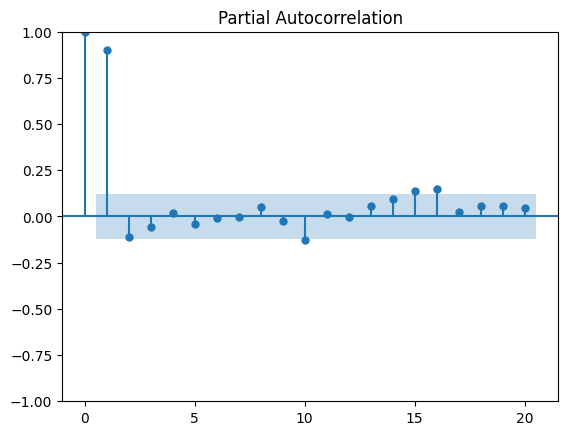

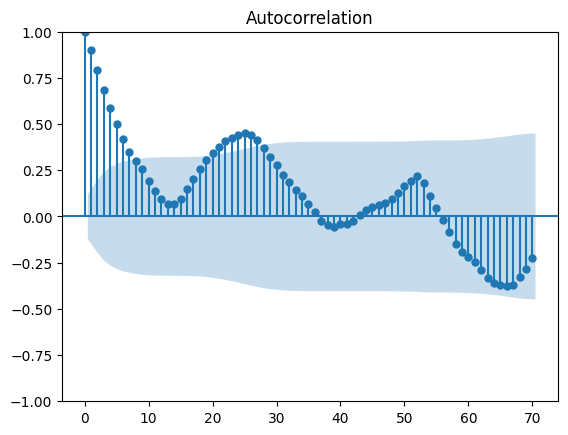

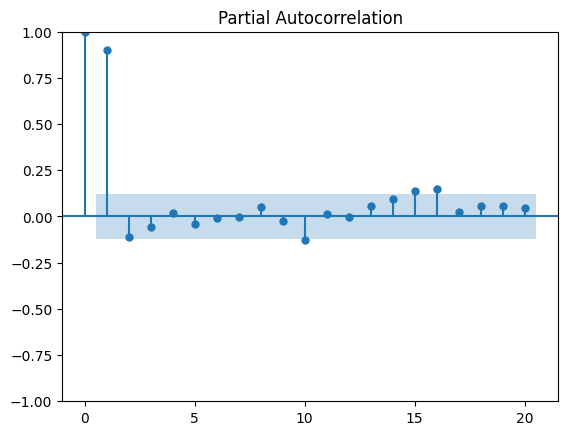

In [145]:
# Check autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(train["nbr_gm"], lags = 70)

# plot PACF
plot_pacf(train["nbr_gm"], lags = 20)

There is a strong autocorrelation with lag = 2. Will create a new column with lag = 2.

## Adding Lag-Feature

In [146]:
# Creating lag features for time-series data

def create_lag_features(data, lag_steps=1):
    dataframe = data.copy()
    for i in range(1, lag_steps + 1):

        dataframe[f'week_lag_{i}'] = dataframe['nbr_gm'].shift(i)

    return dataframe

In [147]:
train_lag = create_lag_features(train, lag_steps = 2)
test_lag = create_lag_features(test, lag_steps = 2)

## Add Rolling Mean

 * Captures trends over short periods

In [148]:
# Creating rolling mean for time-series data

def create_rolling_mean(df, window_size=3):

    df['rolling_mean'] = df['nbr_gm'].rolling(window=window_size).mean()

    return df

# Applying rolling mean to the train and test dataset

train_rolled = create_rolling_mean(train_lag, window_size=7)
test_rolled = create_rolling_mean(test_lag, window_size=7)

## Add Fourier Transformation for capturing seasonality

In [149]:
from scipy.fft import fft

def apply_fourier_transform(df):

    values = df['nbr_gm'].values

    fourier_transform = fft(values)

    df['fourier_transform'] = np.abs(fourier_transform)

    return df

# Applying Fourier transformation to the dataset

train_fourier = apply_fourier_transform(train_lag)
test_fourier = apply_fourier_transform(test_lag)

In [150]:
## Global function

def time_series_var(data,lag_calc = True, lag_steps = 1, rolling_mean = True, window_size = 8, fourier = True):
    """
    Function to take a dataset through feature engineering for lag, rolling mean and fourier transformation
    """

    from scipy.fft import fft
    
    dataframe = data.copy()
    if lag_calc == True:
        for i in range(1, lag_steps + 1):

            dataframe[f'week_lag_{i}'] = dataframe['nbr_gm'].shift(i)

    if rolling_mean == True:
        dataframe['rolling_mean'] = dataframe['nbr_gm'].rolling(window=window_size).mean()

    if fourier:
        # Handling NaNs by filling with an appropriate value or interpolation before FFT
        values = dataframe['nbr_gm'].fillna(method='ffill').values  # Example: forward fill
        
        if len(values) > 0:
            fourier_transform = fft(values)
            dataframe['fourier_transform'] = np.abs(fourier_transform)
        else:
            dataframe['fourier_transform'] = np.nan

    
    return dataframe

In [151]:
train_updated = time_series_var(train)
test_updated = time_series_var(test)

# Statistical Learning
---

## Business Unit Predictions

In [152]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fonction pour calculer MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Fonction pour calculer SMAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred)) / 2)) * 100

# Fonction pour calculer et afficher les métriques pour chaque modèle
def calculate_and_display_metrics(df, feature, split_time='2023-01-01'):
    models = {
        'AR': AutoReg,
        'MA': ARIMA,
        'ARMA': ARIMA,
        'ARIMA': ARIMA,
        'HWES': ExponentialSmoothing
    }

    results = []

    for model_name, model_func in models.items():
        for feature_unit in sorted(df[feature].unique()):
            df_feature = df[df[feature] == feature_unit]
            df_agg = process_data(df_feature)

            # Train Test Split
            train, test = split_data(df_agg, split_time)

            # Instantiate model
            if model_name == 'AR':
                model = model_func(train['nbr_gm'], lags=1)  # Utilisation d'un décalage de 1 pour AR
            else:
                model = model_func(train['nbr_gm'])  # Pas d'arguments supplémentaires pour ExponentialSmoothing

            # Fit model
            model_fit = model.fit()

            # Make predictions
            y_pred = model_fit.forecast(steps=len(test))

            # Calculate metrics
            mse = mean_squared_error(test['nbr_gm'], y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(test['nbr_gm'], y_pred)
            mape = mean_absolute_percentage_error(test['nbr_gm'], y_pred)
            smape = symmetric_mean_absolute_percentage_error(test['nbr_gm'], y_pred)
            r2 = 1 - (np.sum((test['nbr_gm'] - y_pred) ** 2) / np.sum((test['nbr_gm'] - np.mean(test['nbr_gm'])) ** 2))

            results.append({
                'Feature': feature_unit,
                'Model': model_name,
                'MSE': mse,
                'RMSE': rmse,
                'MAE': mae,
                'MAPE': mape,
                'SMAPE': smape,
                'R2': r2
            })

    results_df = pd.DataFrame(results)
    return results_df.to_string(index=False)  # Convertit le DataFrame en chaîne de caractères pour l'impression

In [153]:
# Utilisation de la fonction pour calculer et afficher les métriques
print(calculate_and_display_metrics(df, 'business_unit'))

      Feature Model          MSE        RMSE         MAE       MAPE     SMAPE        R2
        CH-ML    AR 6.456950e+06 2541.052850 1817.850508  37.851057 46.698945 -0.458899
          EAF    AR 1.870840e+07 4325.320982 3373.258379  35.808877 36.930702 -0.174668
         ESAP    AR 2.970988e+06 1723.655285 1299.182041  29.251144 33.437129 -0.743876
NORTH AMERICA    AR 2.226676e+06 1492.204959 1222.980498  33.227631 38.108928 -0.870417
SOUTH AMERICA    AR 9.218143e+05  960.111620  615.557563  34.108449 30.407098  0.469335
        CH-ML    MA 6.949964e+06 2636.278515 1891.204686  38.894308 49.096727 -0.570292
          EAF    MA 2.306163e+07 4802.252999 3694.333538  36.441266 41.095341 -0.447999
         ESAP    MA 4.166240e+06 2041.136863 1634.322226  35.529593 45.149011 -1.445451
NORTH AMERICA    MA 3.790263e+06 1946.859879 1662.307098  43.429662 57.423128 -2.183837
SOUTH AMERICA    MA 1.883677e+06 1372.471051  759.022068  36.238244 35.795120 -0.084385
        CH-ML  ARMA 6.949964e+06

C:\Users\manuc\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [154]:
# Vérifier les données d'entrée
print(df.head())

# Vérifier les valeurs uniques de la caractéristique 'market'
print(df['market'].unique())

# Vérifier la taille des ensembles d'entraînement et de test pour chaque valeur de 'market'
for feature_unit in sorted(df['market'].unique()):
    df_feature = df[df['market'] == feature_unit]
    df_agg = process_data(df_feature)
    train, test = split_data(df_agg, split_time)
    print(f'Market: {feature_unit}, Train Size: {len(train)}, Test Size: {len(test)}')


   Unnamed: 0 business_unit client_typo  code_market code_resort loyal_new  \
0           0         CH-ML      Adults          370        AEXC       New   
1           1         CH-ML      Adults          370        AEXC       New   
2           2         CH-ML      Adults          370        ALBC     Loyal   
3           3         CH-ML      Adults          370        ALBC     Loyal   
4           4         CH-ML      Adults          370        ALBC     Loyal   

           market  month        resort                    sector_resort  \
0  CHINA MAINLAND     12  ARCS EXTREME                  EUROPE MOUNTAIN   
1  CHINA MAINLAND     12  ARCS EXTREME                  EUROPE MOUNTAIN   
2  CHINA MAINLAND      1        ALBION  EUROPE AFRICA SEA & COUNTRYSIDE   
3  CHINA MAINLAND      1        ALBION  EUROPE AFRICA SEA & COUNTRYSIDE   
4  CHINA MAINLAND      1        ALBION  EUROPE AFRICA SEA & COUNTRYSIDE   

     week_ref  year  nbr_gm  
0  2018-12-15  2018       2  
1  2019-12-14  2019 

In [155]:
df_copy.head()


,Unnamed: 0,business_unit,client_typo,loyal_new,market,resort,sector_resort,week_ref,nbr_gm
97324,112011,EAF,Family,Loyal,ITALY,PUNTA CANA,NORTH AMERICA,2017-12-30,4
192597,216826,SOUTH AMERICA,Adults,New,ARGENTINA,RIO DAS PEDRAS,SOUTH AMERICA,2017-12-30,10
135578,154459,ESAP,Adults,New,HONG KONG MARKET,KANIFINOLHU,ASIA SUN,2017-12-30,1
92579,106381,EAF,Family,New,SWITZERLAND,GRAND MASSIF SAMOENS,EUROPE MOUNTAIN,2017-12-30,2
135453,154334,ESAP,Adults,Loyal,HONG KONG MARKET,KANIFINOLHU,ASIA SUN,2017-12-30,2


A "respectful" MAPE value largely depends on the context of the analysis, the industry standards, and the complexity of the data being forecasted. Generally, MAPE is used to assess the accuracy of forecasting models by comparing predicted values to actual values in percentage terms. The acceptability of a MAPE value is subjective and varies by application area. Here's a general guide to interpreting MAPE values:

MAPE < 10%: Excellent. The model's forecasts are very close to the actual values.
MAPE between 10% and 20%: Good. The forecasts are reasonable and can be considered accurate for many applications.
MAPE between 20% and 50%: Fair. The accuracy is moderate, and the model might need improvement, depending on the application.
MAPE > 50%: Poor. The model's forecasts are inaccurate and likely need significant revisions or reconsideration of the forecasting approach.

## Market

In [156]:
df_copy[df_copy['market'] == "IRELAND"]

,Unnamed: 0,business_unit,client_typo,loyal_new,market,resort,sector_resort,week_ref,nbr_gm
68721,78907,EAF,Adults,New,IRELAND,CEFALU,EUROPE AFRICA SEA & COUNTRYSIDE,2023-07-08,2
119837,137916,EAF,Family,New,IRELAND,TIGNES,EUROPE MOUNTAIN,2023-08-05,4
119829,137908,EAF,Family,New,IRELAND,LA PALMYRE ATLANTIQUE,EUROPE AFRICA SEA & COUNTRYSIDE,2023-08-26,3
68725,78911,EAF,Adults,New,IRELAND,MAGNA MARBELLA,EUROPE AFRICA SEA & COUNTRYSIDE,2023-09-02,1
119830,137909,EAF,Family,New,IRELAND,LA PALMYRE ATLANTIQUE,EUROPE AFRICA SEA & COUNTRYSIDE,2023-09-09,4
119827,137906,EAF,Family,New,IRELAND,DA BALAIA,EUROPE AFRICA SEA & COUNTRYSIDE,2023-09-09,3
119828,137907,EAF,Family,Loyal,IRELAND,GREGOLIMANO,EUROPE AFRICA SEA & COUNTRYSIDE,2023-09-16,5
68719,78905,EAF,Adults,New,IRELAND,BODRUM PALMIYE,EUROPE AFRICA SEA & COUNTRYSIDE,2023-09-23,1
68726,78912,EAF,Adults,New,IRELAND,MAGNA MARBELLA,EUROPE AFRICA SEA & COUNTRYSIDE,2023-09-30,2
68722,78908,EAF,Adults,New,IRELAND,CEFALU,EUROPE AFRICA SEA & COUNTRYSIDE,2023-10-07,2


In [157]:
df_copy2 = df.copy()

In [158]:
df_copy2

,Unnamed: 0,business_unit,client_typo,code_market,code_resort,loyal_new,market,month,resort,sector_resort,week_ref,year,nbr_gm
0,0,CH-ML,Adults,370,AEXC,New,CHINA MAINLAND,12,ARCS EXTREME,EUROPE MOUNTAIN,2018-12-15,2018,2
1,1,CH-ML,Adults,370,AEXC,New,CHINA MAINLAND,12,ARCS EXTREME,EUROPE MOUNTAIN,2019-12-14,2019,1
2,2,CH-ML,Adults,370,ALBC,Loyal,CHINA MAINLAND,1,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2018-01-27,2018,9
3,3,CH-ML,Adults,370,ALBC,Loyal,CHINA MAINLAND,1,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2019-01-26,2019,6
4,4,CH-ML,Adults,370,ALBC,Loyal,CHINA MAINLAND,1,ALBION,EUROPE AFRICA SEA & COUNTRYSIDE,2020-01-04,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200295,225395,SOUTH AMERICA,Family,820,TRAC,New,CHILE,12,TRANCOSO,SOUTH AMERICA,2019-12-14,2019,5
200296,225396,SOUTH AMERICA,Family,820,TRAC,New,CHILE,12,TRANCOSO,SOUTH AMERICA,2023-12-16,2023,2
200297,225397,SOUTH AMERICA,Family,820,VMOC,New,CHILE,1,VALMOREL,EUROPE MOUNTAIN,2018-01-13,2018,3
200298,225398,SOUTH AMERICA,Family,820,VTHC,Loyal,CHILE,1,VAL THORENS SENSATIONS,EUROPE MOUNTAIN,2019-01-19,2019,4


In [159]:
top_10 = df_copy2.groupby(["market"]).agg({'nbr_gm' : "sum"}).sort_values(by="nbr_gm", ascending=False).head(10)

In [160]:
top_10

,nbr_gm
market,
FRANCE,1359534
CHINA MAINLAND,822679
BRAZIL,424356
USA,311564
CANADA,259207
BELGIUM,234222
JAPAN,221755
MALAYSIA,173459
SINGAPORE,152025


In [161]:
top_10.index

Index(['FRANCE', 'CHINA MAINLAND', 'BRAZIL', 'USA', 'CANADA', 'BELGIUM',
       'JAPAN', 'MALAYSIA', 'SINGAPORE', 'UNITED KINGDOM'],
      dtype='object', name='market')

In [162]:
df_copy_filtered = df_copy[df_copy['market'].isin(top_10.index)]
df_copy_without_2021 = df_copy_filtered[pd.to_datetime(df_copy_filtered['week_ref']).dt.year != 2020]
print(df_copy_without_2021["week_ref"].value_counts())

2023-12-23    808
2023-12-16    695
2019-12-21    692
2022-12-24    664
2022-12-31    653
             ... 
2021-03-06     66
2021-03-20     65
2021-04-17     64
2021-02-27     62
2021-04-10     56
Name: week_ref, Length: 262, dtype: int64


In [163]:
# Utilisation de la fonction pour calculer et afficher les métriques
print(calculate_and_display_metrics(df_copy_filtered, "market"))

       Feature Model          MSE        RMSE         MAE       MAPE     SMAPE         R2
       BELGIUM    AR 3.501666e+05  591.748769  438.685371  54.718427 47.314761  -0.201425
        BRAZIL    AR 7.740333e+05  879.791601  549.088285  37.821825 31.856473   0.449657
        CANADA    AR 6.853008e+05  827.828991  646.003676  40.465074 42.164941  -0.494296
CHINA MAINLAND    AR 6.456950e+06 2541.052850 1817.850508  37.851057 46.698945  -0.458899
        FRANCE    AR 1.297766e+07 3602.451532 2675.479170  44.019111 46.719809  -0.229323
         JAPAN    AR 4.073100e+05  638.208394  482.739513  68.670851 54.215828  -0.278237
      MALAYSIA    AR 1.502855e+05  387.666751  299.862346  42.128699 39.472396  -0.094552
     SINGAPORE    AR 6.917535e+05  831.717203  488.381982  55.963793 53.992729  -0.143020
UNITED KINGDOM    AR 9.427333e+05  970.944552  529.145991  91.344427 68.822717  -0.137624
           USA    AR 8.322175e+05  912.259580  618.431337  33.326579 41.566160  -0.550066
       BEL

C:\Users\manuc\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Loyal vs. New

In [164]:
# Utilisation de la fonction pour calculer et afficher les métriques
print(calculate_and_display_metrics(df, 'loyal_new'))

C:\Users\manuc\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Feature Model          MSE        RMSE         MAE      MAPE     SMAPE        R2
  Loyal    AR 8.903563e+06 2983.883881 2192.211652 26.462963 28.498487 -0.049204
    New    AR 2.624443e+07 5122.931728 3576.074909 20.634316 24.800764 -0.558965
  Loyal    MA 1.298279e+07 3603.164347 2729.577893 30.501710 36.233153 -0.529905
    New    MA 5.535978e+07 7440.415235 6214.096807 36.312606 47.291472 -2.288467
  Loyal  ARMA 1.298279e+07 3603.164347 2729.577893 30.501710 36.233153 -0.529905
    New  ARMA 5.535978e+07 7440.415235 6214.096807 36.312606 47.291472 -2.288467
  Loyal ARIMA 1.298279e+07 3603.164347 2729.577893 30.501710 36.233153 -0.529905
    New ARIMA 5.535978e+07 7440.415235 6214.096807 36.312606 47.291472 -2.288467
  Loyal  HWES 1.790471e+07 4231.395490 3674.913278 64.867808 43.573162 -1.109908
    New  HWES 4.914262e+07 7010.180091 5944.424741 50.072886 35.916084 -1.919157


## Client Type (Family vs. Adult)

In [165]:
print(calculate_and_display_metrics(df, 'client_typo'))

Feature Model          MSE         RMSE         MAE      MAPE     SMAPE        R2
 Adults    AR 7.301450e+06  2702.119448 2337.469663 25.870449 30.654578 -1.409152
 Family    AR 4.813005e+07  6937.582309 5128.216893 34.586888 37.232793 -0.242126
 Adults    MA 1.341571e+07  3662.746385 3236.105862 35.633994 44.747908 -3.426585
 Family    MA 6.524405e+07  8077.378658 6296.118941 39.351876 47.251415 -0.683798
 Adults  ARMA 1.341571e+07  3662.746385 3236.105862 35.633994 44.747908 -3.426585
 Family  ARMA 6.524405e+07  8077.378658 6296.118941 39.351876 47.251415 -0.683798
 Adults ARIMA 1.341571e+07  3662.746385 3236.105862 35.633994 44.747908 -3.426585
 Family ARIMA 6.524405e+07  8077.378658 6296.118941 39.351876 47.251415 -0.683798
 Adults  HWES 3.569526e+06  1889.318932 1595.461534 20.582977 18.466024 -0.177784
 Family  HWES 1.037335e+08 10184.965257 8674.560086 96.255612 53.347870 -1.677123


C:\Users\manuc\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
